# Kaggle Chanllenge: School Score Prediction
https://www.kaggle.com/kwadwoofosu/predict-test-scores-of-students
Predict the post test of the students
Dataset contains information about a test written by some students. It include features such as: School setting, School type, gender, pretetest scores among other. Explore the data to know more!

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("./test_scores.csv")

## Describing data

In [4]:
print(f"Number of Rows: {data.shape[0]}, number of columns: {data.shape[1]}")
print(f"Headers: {data.columns.values}")
data.info()

Number of Rows: 2133, number of columns: 11
Headers: ['school' 'school_setting' 'school_type' 'classroom' 'teaching_method'
 'n_student' 'student_id' 'gender' 'lunch' 'pretest' 'posttest']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school           2133 non-null   object 
 1   school_setting   2133 non-null   object 
 2   school_type      2133 non-null   object 
 3   classroom        2133 non-null   object 
 4   teaching_method  2133 non-null   object 
 5   n_student        2133 non-null   float64
 6   student_id       2133 non-null   object 
 7   gender           2133 non-null   object 
 8   lunch            2133 non-null   object 
 9   pretest          2133 non-null   float64
 10  posttest         2133 non-null   float64
dtypes: float64(3), object(8)
memory usage: 183.4+ KB


In [5]:
data.describe()

,n_student,pretest,posttest
count,2133.000000,2133.000000,2133.000000
mean,22.796531,54.955931,67.102203
std,4.228893,13.563101,13.986789
min,14.000000,22.000000,32.000000
25%,20.000000,44.000000,56.000000
50%,22.000000,56.000000,68.000000
75%,27.000000,65.000000,77.000000
max,31.000000,93.000000,100.000000


In [6]:
data.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0


## Dealing with missing values

In [7]:
data.isnull().sum()

school             0
school_setting     0
school_type        0
classroom          0
teaching_method    0
n_student          0
student_id         0
gender             0
lunch              0
pretest            0
posttest           0
dtype: int64

## Drop unessescery columns

In [8]:
data.drop(columns=["classroom", "student_id"], inplace=True)

### No missing values found

## Visualize Data

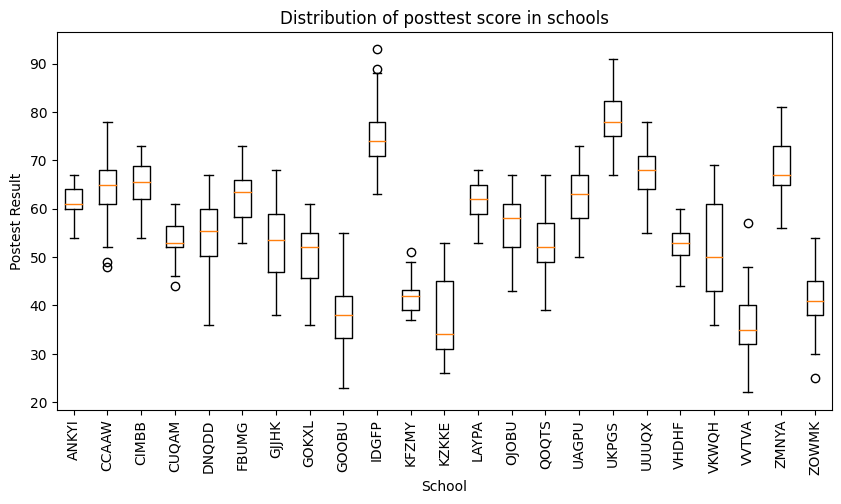

In [9]:
schools = data["school"].unique().tolist()

schResults = {}
for sch in schools:
    results = data[ data["school"] == sch ]["pretest"].tolist()
    schResults.setdefault(sch, results)


plt.figure(figsize=(10, 5), dpi=100)
plt.boxplot(list(schResults.values()), labels=list(schResults.keys()))

plt.xticks(rotation="vertical")
plt.xlabel("School")
plt.ylabel("Postest Result")

plt.title("Distribution of posttest score in schools")
plt.show()

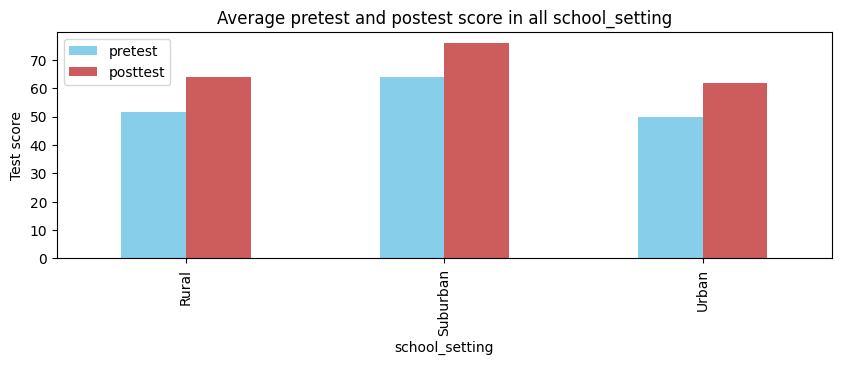

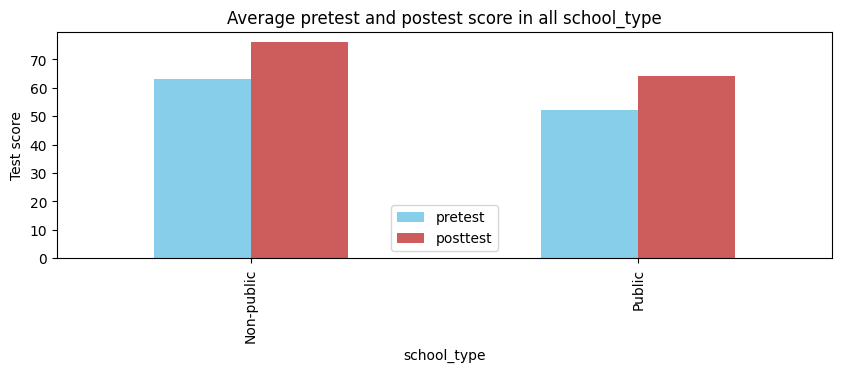

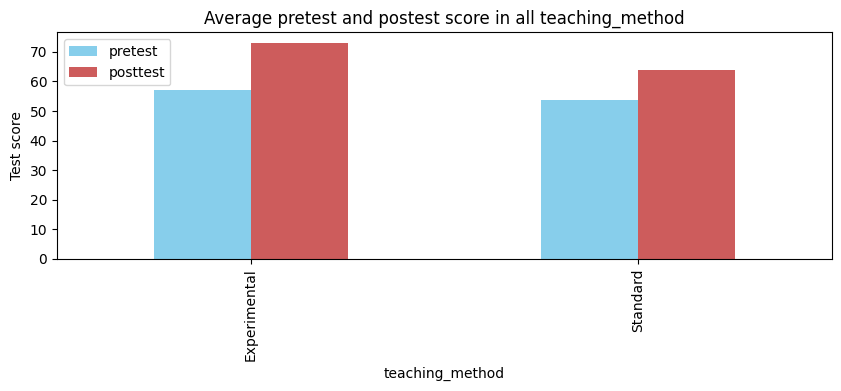

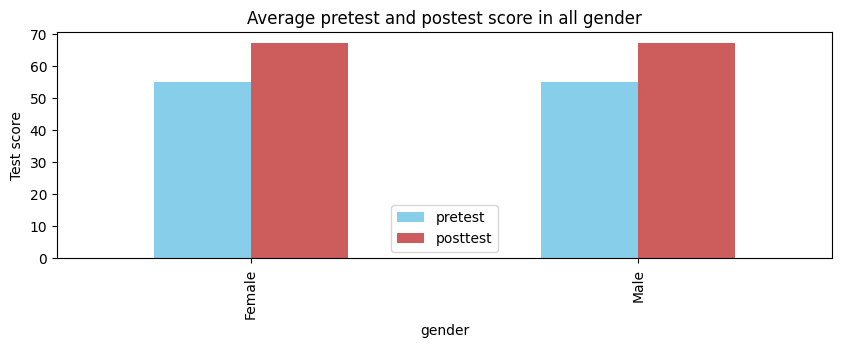

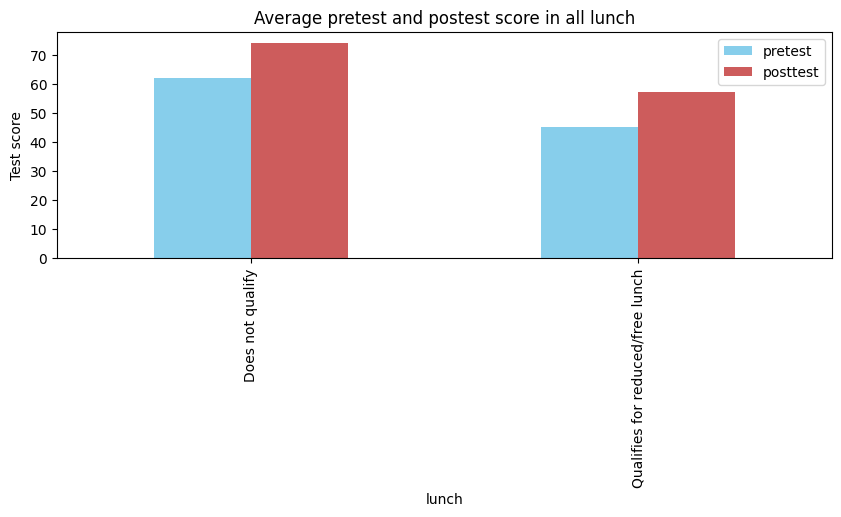

In [10]:
headers = data.columns.tolist()

plt.rcParams["figure.dpi"] = 100
for header in headers:
    if header in ("pretest", "posttest", "n_student", "school"):
        continue
    
    avgScore = data.groupby(header)[["pretest", "posttest"]].mean().reset_index()

    ax = avgScore.plot.bar(color=["SkyBlue","IndianRed"], rot=0, title=f"Average pretest and postest score in all {header}", figsize=(10, 3))
    ax.set_xlabel(header)
    ax.set_xticklabels(avgScore[header], rotation="vertical")
    ax.set_ylabel("Test score")

plt.show()

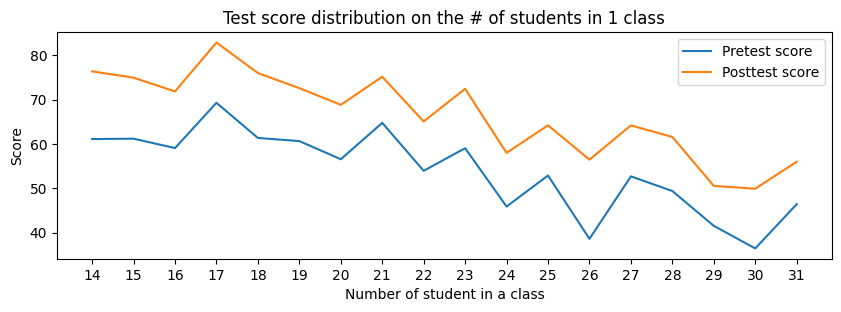

In [11]:
# Correlation between the number of students in class and average pretest and postest score

numOfStudenAvg = data.groupby("n_student")[["pretest", "posttest"]].mean().reset_index()

plt.figure(figsize=(10, 3), dpi=100)
plt.plot(numOfStudenAvg["n_student"], numOfStudenAvg["pretest"], label="Pretest score")
plt.plot(numOfStudenAvg["n_student"], numOfStudenAvg["posttest"], label="Posttest score")

plt.xlabel("Number of student in a class")
plt.ylabel("Score")
plt.xticks(numOfStudenAvg["n_student"])

plt.title("Test score distribution on the # of students in 1 class")
plt.legend()
plt.show()

## Transform data

In [12]:
data.head()

,school,school_setting,school_type,teaching_method,n_student,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,Standard,20.0,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,Standard,20.0,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,Standard,20.0,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,Standard,20.0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,Standard,20.0,Male,Does not qualify,64.0,76.0


In [13]:
X = data.drop("posttest", axis=1)
y = data["posttest"]

# Convert categorical values to numbers
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

categories = ["school", "school_setting", "school_type", "teaching_method", "n_student", "gender", "lunch", "pretest"]

oneHotEnc = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", oneHotEnc, categories)], remainder="passthrough")

tranformedX = transformer.fit_transform(X)

In [14]:
## Spliting set
from sklearn.model_selection import train_test_split

trainX, testX, trainY, testY = train_test_split(tranformedX, y, test_size=0.25, random_state=42)

In [15]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# NOTE MAE (Mean absolute error) represents the difference between the original and predicted values extracted by averaged the absolute difference over the data set.
# MSE (Mean Squared Error) represents the difference between the original and predicted values extracted by squared the average difference over the data set.

def evaluation_metrics(y_true, y_preds):
    '''
    A function to compute and return the evaluation metrics in the form of a dictionary.
    '''
    r2 = r2_score(y_true, y_preds)
    mae = mean_absolute_error(y_true, y_preds)
    mse = mean_squared_error(y_true, y_preds)
    
    metrics = {'r2_score' : r2,
               'mean absolute error' : round(mae, 2),
               'mean_squared error' : round(mse, 2)}
    
    print(f'R2_score: {r2 * 100:.2f}%')
    print(f'MAE: {mae:.2f}')
    print(f'MSE: {mse:.2f}')
    
    return metrics

## Regression Model

In [16]:
## Support Vector Regressor

from sklearn.svm import SVR
rgsSVM = SVR(gamma=0.1).fit(trainX, trainY)

evaluation_metrics(testY, rgsSVM.predict(testX))

R2_score: 83.85%
MAE: 4.40
MSE: 31.54


{'r2_score': 0.8384945222090002,
 'mean absolute error': 4.4,
 'mean_squared error': 31.54}

In [17]:
## Linear Regressior

from sklearn.linear_model import LinearRegression
rgsLin = LinearRegression().fit(trainX, trainY)
evaluation_metrics(testY, rgsLin.predict(testX))

R2_score: 92.95%
MAE: 2.67
MSE: 13.77


{'r2_score': 0.929452669175428,
 'mean absolute error': 2.67,
 'mean_squared error': 13.77}

In [18]:
## Logistic Regressior

from sklearn.linear_model import LogisticRegression
rgsLog = LogisticRegression().fit(trainX, trainY)
evaluation_metrics(testY, rgsLog.predict(testX))

R2_score: 89.90%
MAE: 3.36
MSE: 19.72


{'r2_score': 0.899009598939143,
 'mean absolute error': 3.36,
 'mean_squared error': 19.72}

In [19]:
# Import the Random Forest regressor
from sklearn.ensemble import RandomForestRegressor

rgsRF = RandomForestRegressor().fit(trainX, trainY)
evaluation_metrics(testY, rgsRF.predict(testX))


R2_score: 92.29%
MAE: 3.00
MSE: 15.06


{'r2_score': 0.922881338315058,
 'mean absolute error': 3.0,
 'mean_squared error': 15.06}

In [20]:
from sklearn.tree import DecisionTreeRegressor
rgsDec = DecisionTreeRegressor(max_leaf_nodes=100).fit(trainX, trainY)
evaluation_metrics(testY, rgsDec.predict(testX))

R2_score: 91.77%
MAE: 3.04
MSE: 16.07


{'r2_score': 0.9176799158276351,
 'mean absolute error': 3.04,
 'mean_squared error': 16.07}

## Hyperarameter Tuning

In [21]:
from sklearn.model_selection import RandomizedSearchCV

model = RandomForestRegressor(n_jobs=-1)  # The number of jobs to run in parallel, -1 means using all processors

grid = {
    'n_estimators' : [10, 100, 200, 500, 1000, 1200],
    'max_depth' : [None, 5, 10, 20, 30],
    'max_features' : ['auto', 'sqrt'],
    'min_samples_split' : [2, 4, 6 ],
    'min_samples_leaf' : [1, 2, 4]
}

modelRS = RandomizedSearchCV(
    estimator = model, 
    param_distributions = grid,
    n_iter = 20,
    cv = 5,
    verbose = 2
)

modelRS.fit(trainX, trainY)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   2.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   1.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   1.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   1.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   1.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimato

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1), n_iter=20,
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [22]:
print(modelRS.best_params_)
evaluation_metrics(testY, modelRS.predict(testX))

{'n_estimators': 200, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}
R2_score: 93.31%
MAE: 2.81
MSE: 13.05


{'r2_score': 0.9331417986761359,
 'mean absolute error': 2.81,
 'mean_squared error': 13.05}

## Save the most accurate model

In [23]:
import pickle

with open("./school_score_prediction.pkl", "wb") as f:
    pickle.dump(modelRS, f)